# Components

npx_10m

In [20]:
# SETUP PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pprint as pp
import pandas as pd
import yaml
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si
import spikeinterface.widgets as sw
import spikeinterface.postprocessing as spost
from probeinterface.plotting import plot_probe
from spikeinterface.comparison import GroundTruthStudy
import shutil
from datetime import datetime

pd.set_option('display.max_colwidth', None)

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/bernstein_2023/"

os.chdir(PROJ_PATH)
from src.nodes.load import load_campaign_params
from src.nodes.truth.silico import ground_truth
from src.nodes.dataeng.silico import probe_wiring
from src.nodes.prepro import preprocess

from src.nodes.utils import get_config, write_metadata
from src.nodes.dataeng.silico import recording

# SET PARAMETERS
EXPERIMENT = "vivo_reyes"   # experiment 
SIMULATION_DATE = "2015"      # run (date)<


# SETUP CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()
data_conf["preprocessing"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-09-15 13:22:54,338 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-15 13:22:54,346 - root - utils.py - get_config - INFO - Reading experiment config. - done


{'output': {'trace_file_path': '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/preprocessed/1_vivo/reyes/campaign/traces'}}

### Load preprocessed

In [21]:
# load wired recording
Preprocessed = preprocess.load(data_conf)

### Plot

In [22]:
# inspect the preprocessed traces
duration = Preprocessed.get_total_duration()
print(f"- duration: {duration} secs")
print(f"- channel (count): {Preprocessed.get_num_channels()} channels")
print("- channel coords:") 
print(Preprocessed.get_channel_locations())

- duration: 3300.0 secs
- channel (count): 16 channels
- channel coords:
[[   0.  400.]
 [   0.  600.]
 [   0.  200.]
 [   0. 1000.]
 [   0.  800.]
 [   0.    0.]
 [   0. 1200.]
 [   0. 1400.]
 [   0. 1500.]
 [   0. 1300.]
 [   0.  100.]
 [   0.  900.]
 [   0. 1100.]
 [   0.  300.]
 [   0.  700.]
 [   0.  500.]]


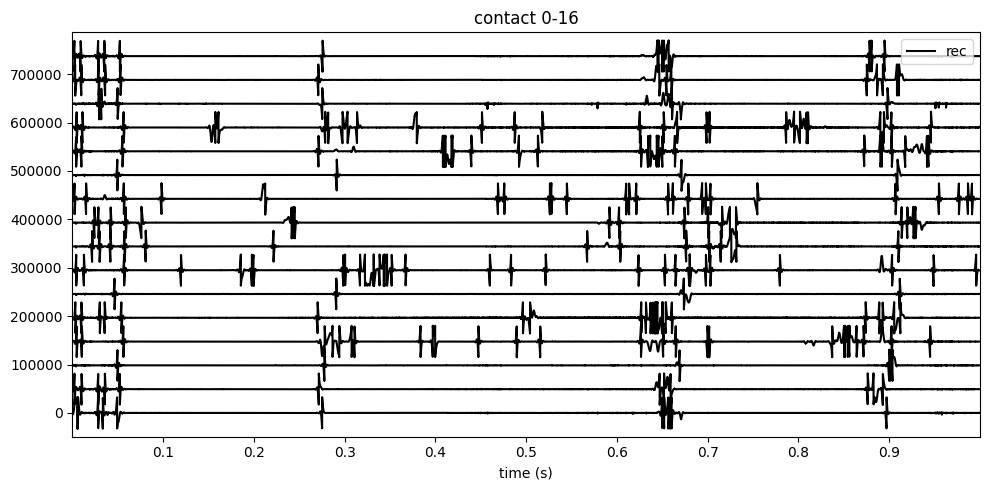

In [25]:
# takes 28 secs
fig, axes = plt.subplots(1,1, figsize=(10,5));

# get all contacts
CHANNEL_IDS = Preprocessed.channel_ids

# get one second
duration = 1

# plot contacts (contacts 0 to 30-ish are not in the circuit, see probe_location.ipynb)
sw.plot_timeseries(Preprocessed, channel_ids = CHANNEL_IDS, time_range = (0, duration), ax=axes);
axes.set_title("contact 0-16");
axes.set_xlabel("time (s)");
plt.tight_layout()

# References

(1) https://bbpgitlab.epfl.ch/conn/personal/imbeni/spike-sorting/-/blob/dev/legacy%20exploratory%20scripts/Reyes_16offline_spont.ipynb